In [1]:
#Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
import requests
import gmaps
import os
import json
import time

In [2]:
#the set the path
csv_path = "../Resources/country_vaccinations_clean.csv"

# Read our COVID data into pandas
covid_df = pd.read_csv(csv_path)
covid_df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name
0,Algeria,DZA,1/29/2021,0,0,0,0,0,0,0,0,0,Sputnik V,Ministry of Health
1,Algeria,DZA,1/30/2021,30,0,0,30,30,0,0,0,1,Sputnik V,Ministry of Health
2,Andorra,AND,1/25/2021,576,576,0,0,0,0,0,0,0,Pfizer/BioNTech,Government of Andorra
3,Andorra,AND,1/26/2021,0,0,0,0,66,0,0,0,854,Pfizer/BioNTech,Government of Andorra
4,Andorra,AND,1/27/2021,0,0,0,0,66,0,0,0,854,Pfizer/BioNTech,Government of Andorra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463,Wales,0,2/2/2021,463657,462497,1160,22951,21530,14,14,0,6829,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom
2464,Wales,0,2/3/2021,491786,490570,1216,28129,22149,15,15,0,7025,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom
2465,Wales,0,2/4/2021,524677,523042,1635,32891,23101,16,16,0,7327,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom
2466,Wales,0,2/5/2021,559468,556997,2471,34791,25788,17,17,0,8179,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom


# Store Cleaned Data in DataFrame 1  
Question 1a:  Determine the Number of People Fully Vaccinated by Country and Graph

In [3]:
#Total number of people fully vaccinated by country
#Graph Type:  Bar Chart

#Check the number of countries 
country_count=covid_df["country"].value_counts()
country_count

United Kingdom      56
Northern Ireland    56
England             56
Scotland            56
Wales               56
                    ..
Myanmar              2
Guernsey             1
Greenland            1
Liechtenstein        1
Saint Helena         1
Name: country, Length: 80, dtype: int64

In [4]:
#List the sum of "people_fully_vaccinated" grouped by country
country_sum=covid_df.groupby(["country"]).sum()["people_fully_vaccinated"]
country_sum

country
Algeria                        0
Andorra                        0
Argentina                1125006
Austria                   355860
Bahrain                        0
                          ...   
Turkey                         0
United Arab Emirates     6750000
United Kingdom          13133466
United States           99447760
Wales                      18877
Name: people_fully_vaccinated, Length: 80, dtype: int64

In [5]:
#Total number of people fully vaccinated by country
#Graph Type:  Bar Chart

#Create new DF that only contains country and people_fully_vaccinated columns and removes 0 from people_fully_vaccinated
filtered_countries=covid_df[["country","people_fully_vaccinated"]].copy()
filtered_countries=filtered_countries[filtered_countries["people_fully_vaccinated"] !=0]

filtered_no_zero=filtered_countries.groupby(["country"]).sum()["people_fully_vaccinated"]
filtered_no_zero_df=pd.DataFrame(filtered_no_zero)
filtered_no_zero_df

#Create a sorted DF
fil_no_zero_df_sort=filtered_no_zero_df.sort_values("people_fully_vaccinated")
fil_no_zero_df_sort

,people_fully_vaccinated
country,
Guernsey,522
Faeroe Islands,607
Seychelles,1591
Cayman Islands,3197
Singapore,6100
Jersey,6182
Costa Rica,14446
Isle of Man,16384
Luxembourg,17200


Text(0, 0.5, 'No. of People Fully Vaccinated')

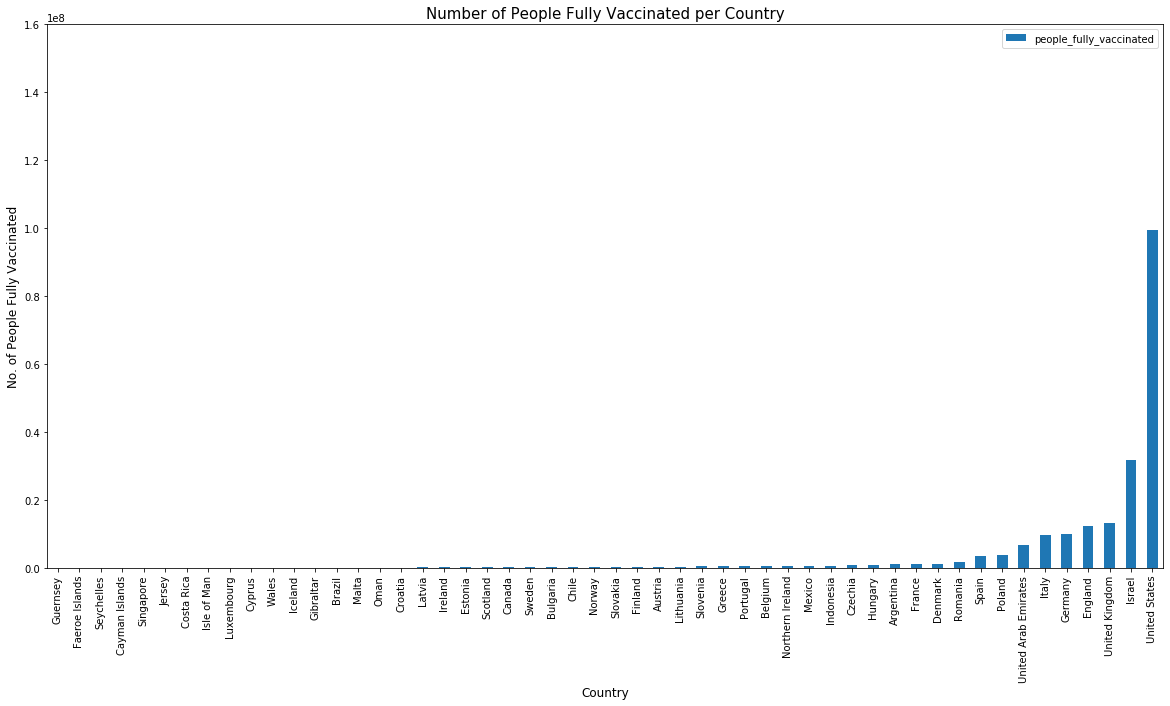

In [6]:
#Plot filtered DataFrame (sorted) into bar graph of people fully vaccinated (sum) grouped by country
fil_no_zero_df_sort.plot.bar(figsize=(20,10))
plt.title("Number of People Fully Vaccinated per Country", fontsize=15)
plt.ylim(0,160000000)
plt.xlabel("Country", fontsize=12)
plt.ylabel("No. of People Fully Vaccinated", fontsize=12)

# Store Cleaned Data in DataFrame 2
Question 1b: Determine the Number of People Fully Vaccinated per Hundred by Country and Graph


In [7]:
#Total number of people fully vaccinated per hundred by country
#Graph Type:  Bar Chart

#Create new DF that only contains country and people_fully_vaccinated_per_hundred columns and removes 0 from people_fully_vaccinated_per_hundred
filtered_countries_hun=covid_df[["country","people_fully_vaccinated_per_hundred"]].copy()
filtered_countries_hun=filtered_countries_hun[filtered_countries_hun["people_fully_vaccinated_per_hundred"] !=0]

filtered_no_zero_hun=filtered_countries_hun.groupby(["country"])["people_fully_vaccinated_per_hundred"].max()
filtered_no_zero__hun_df=pd.DataFrame(filtered_no_zero_hun)
filtered_no_zero__hun_df

#Create a sorted DF
fil_no_zero_df_sort_hun=filtered_no_zero__hun_df.sort_values("people_fully_vaccinated_per_hundred")
fil_no_zero_df_sort_hun

,people_fully_vaccinated_per_hundred
country,
Italy,1
Lithuania,1
Poland,1
Portugal,1
Romania,1
Seychelles,1
Ireland,1
Malta,1
Iceland,1


Text(0, 0.5, 'No. of People Fully Vaccinated per Hundred')

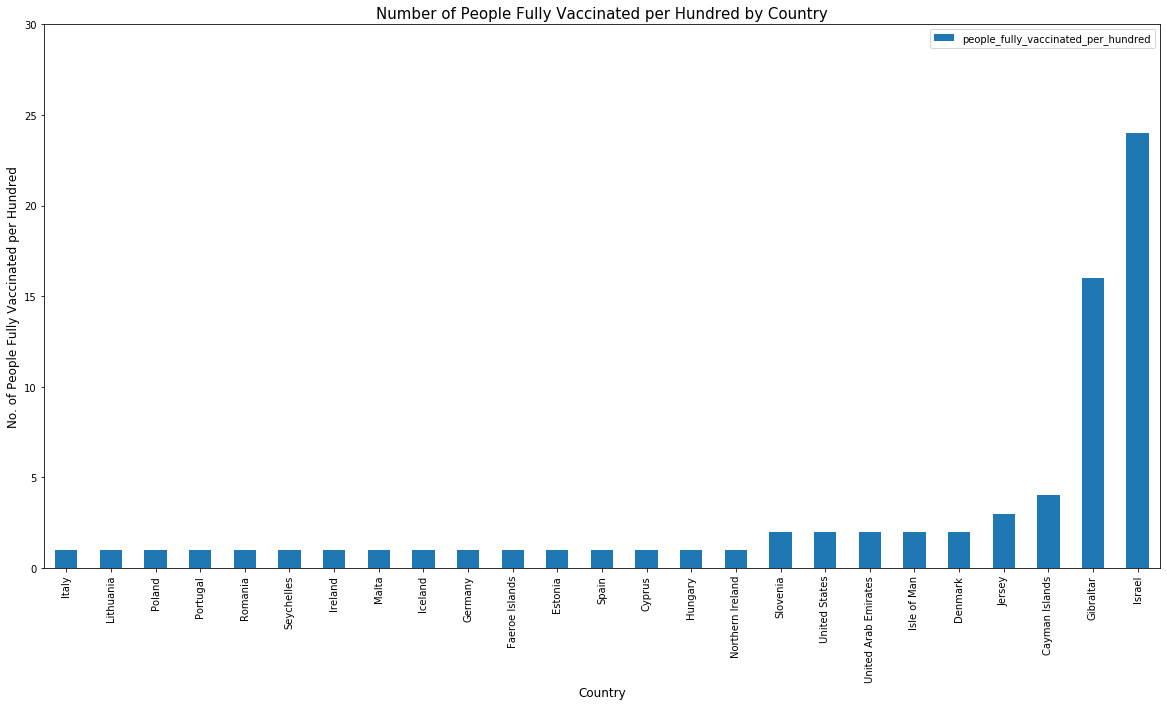

In [8]:
#Plot filtered DataFrame (sorted) into bar graph of people fully vaccinated per hundred (sum) grouped by country
fil_no_zero_df_sort_hun.plot.bar(figsize=(20,10))
plt.title("Number of People Fully Vaccinated per Hundred by Country", fontsize=15)
plt.ylim(0,30)
plt.xlabel("Country", fontsize=12)
plt.ylabel("No. of People Fully Vaccinated per Hundred", fontsize=12)

# Store Cleaned Data in DataFrame 3
Question 2: Which vaccines and mixes are being distributed most /least and Graph

In [9]:
#Which vaccines and mixes are being distributed most /least. 
# Graph Type:  Bar Chart

#Create new DF that only contains country and people_fully_vaccinated columns and removes 0 from people_fully_vaccinated
filtered_countries_vac=covid_df[["country","people_fully_vaccinated","vaccines"]].copy()
filtered_countries_vac=filtered_countries_vac[filtered_countries_vac["people_fully_vaccinated"] !=0]

filtered_no_zero_dist=filtered_countries_vac.groupby(["vaccines"])["people_fully_vaccinated"].sum()
filtered_no_zero_dist_df=pd.DataFrame(filtered_no_zero_dist)
filtered_no_zero_dist_df

#Create a sorted DF
fil_no_zero_dist_sort=filtered_no_zero_dist_df.sort_values("people_fully_vaccinated")
fil_no_zero_dist_sort

,people_fully_vaccinated
vaccines,
"Oxford/AstraZeneca, Sinopharm/Beijing",1591
"Oxford/AstraZeneca, Sinovac",21639
"Pfizer/BioNTech, Sinovac",214047
Sinovac,712755
Sputnik V,1125006
"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",1150869
"Pfizer/BioNTech, Sinopharm/Beijing, Sinopharm/Wuhan",6750000
Pfizer/BioNTech,10766497
"Oxford/AstraZeneca, Pfizer/BioNTech",26260012


Text(0, 0.5, 'Vaccine')

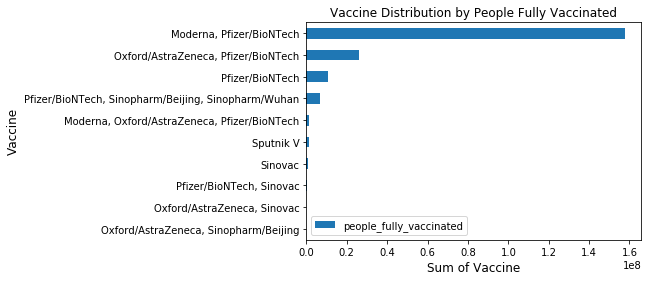

In [10]:
#Graph the results
fil_no_zero_dist_sort.plot.barh()
plt.title("Vaccine Distribution by People Fully Vaccinated", fontsize=12)
#plt.ylim(0,55000000)
plt.xlabel("Sum of Vaccine", fontsize=12)
plt.ylabel("Vaccine", fontsize=12)
#figsize=(20,10)

# Store Cleaned Data in DataFrame 4
Question 3a: What is the general global progression of people fully vaccinated and Graph

In [11]:
#People fully vaccinated counts with date chrono order x axis
# Graph Type:  Line Graph

#Create new DF that only contains country, date and people_fully_vaccinated columns and remove 0 from people_fully_vaccinated
daily_vac=covid_df[["date","country","people_fully_vaccinated"]].copy()
daily_vac=daily_vac[daily_vac["people_fully_vaccinated"] !=0]

#Convert dates to actual dates for my DF
daily_vac["date"]=pd.to_datetime(daily_vac["date"])

filtered_no_zero_daily=daily_vac.groupby(["date"])["people_fully_vaccinated"].sum()
filtered_no_zero_daily_df=pd.DataFrame(filtered_no_zero_daily)
filtered_no_zero_daily_df

#Create a sorted DF
fil_no_zero_daily_sort=filtered_no_zero_daily_df.sort_values("date")
fil_no_zero_daily_sort

,people_fully_vaccinated
date,
2021-01-03,43668
2021-01-04,2
2021-01-05,2
2021-01-06,2
2021-01-07,6
2021-01-08,11
2021-01-09,3650
2021-01-10,1038808
2021-01-11,1099399


Text(0, 0.5, 'Count of People Vaccinated')

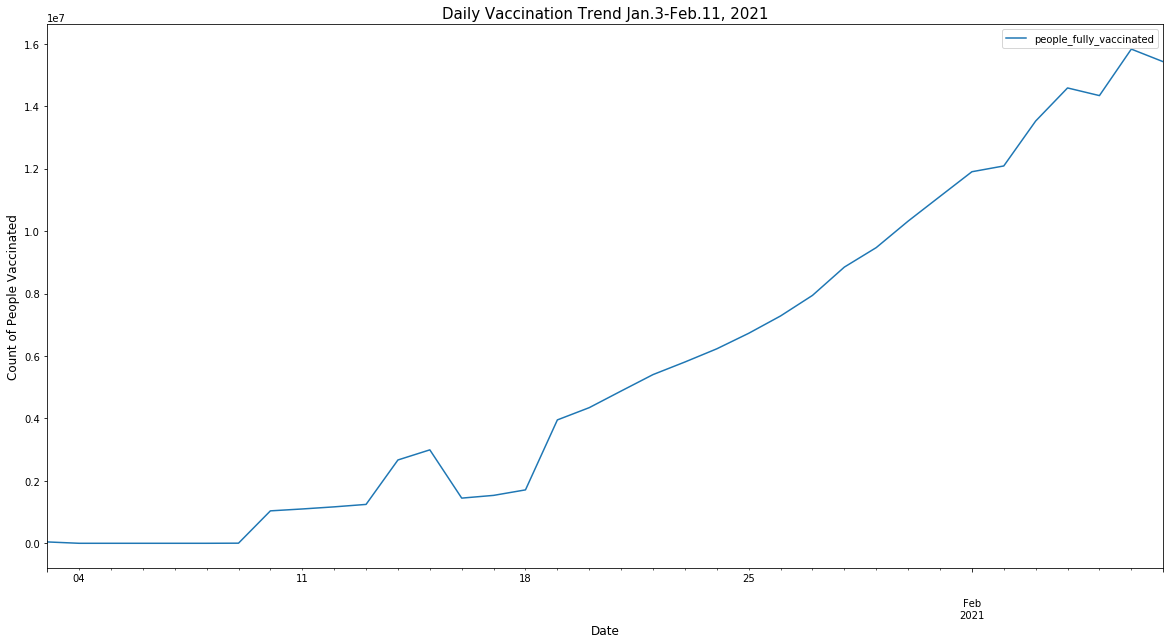

In [12]:
#Graph the results
fil_no_zero_daily_sort.plot.line(figsize=(20,10))
plt.title("Daily Vaccination Trend Jan.3-Feb.11, 2021", fontsize=15)
#plt.ylim(0,50)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Count of People Vaccinated", fontsize=12)

# Store Cleaned Data in DataFrame 5
Question 3b: What is the general global progression of people fully vaccinated (TOP 5) and Graph

In [17]:
#start with original df
covid_df.head()
#verify country count
covid_df["country"].nunique()
#obtain country list to view countries
countrylist = covid_df["country"].unique()
#begin reducing df to core data points needed for line graph
covid_df_Q1line = covid_df.loc[:, ["date", "country", "people_fully_vaccinated"]]
#remove countries with 0
new_newformat = covid_df_Q1line[covid_df_Q1line["people_fully_vaccinated"] !=0]
#create new view set to variable
new_newformat_new = new_newformat[["date", "country","people_fully_vaccinated"]]
#convert variable to dataframe
Country_Column = pd.DataFrame(new_newformat_new)
#change date field to date time data type
Country_Column["date"] = pd.to_datetime(Country_Column["date"])
#date are not appearing in chronological order on x axis - sorted values
sortedbydates=Country_Column.sort_values("date")
#view results
sortedbydates
#obtain updated count of countries
sortedbydates["country"].nunique()
#obtain updated list of countries
new_newformat["country"].unique()
#index data set to prepare for plotting
newformat = sortedbydates.pivot (index="date", columns='country', values='people_fully_vaccinated')

In [18]:
#create variables for each country (note top 5 by count shown only)
England = newformat.loc[:, "England"]
Israel = newformat.loc[:, "Israel"]
Italy = newformat.loc[:, "Italy"]
United_Kingdom = newformat.loc[:, "United Kingdom"]
United_States = newformat.loc[:, "United States"]

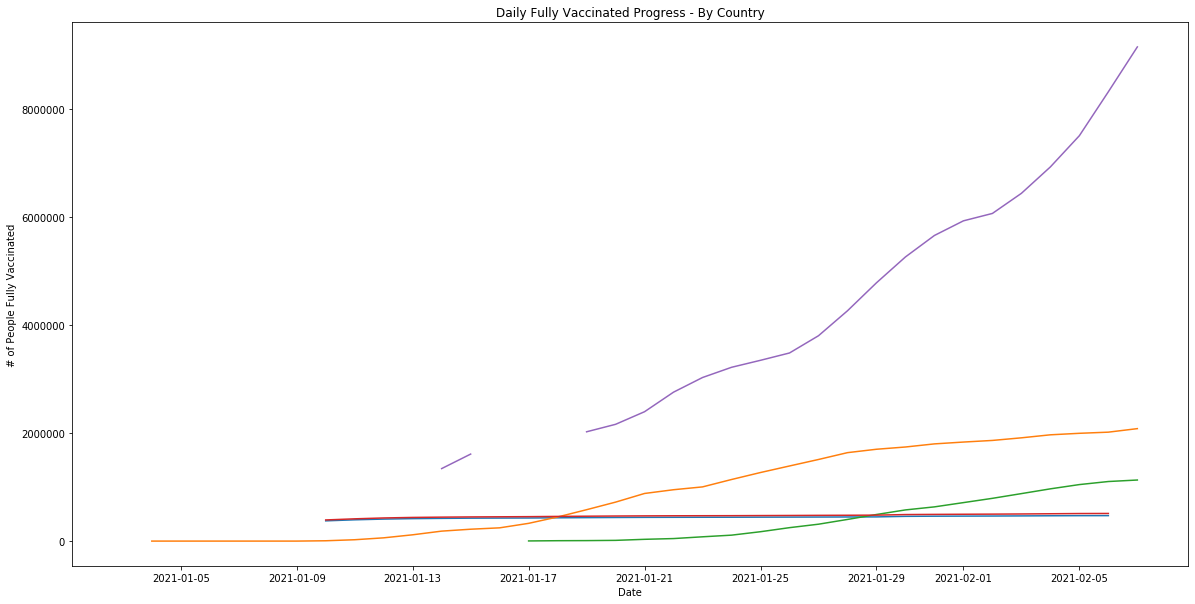

In [20]:
#Plot line graph showing fully vaccinated progress by top countries

# Plot both on the same chart
plt.figure(figsize=(20,10))

plt.plot(England)
plt.plot(Israel)
plt.plot(Italy)
plt.plot(United_Kingdom)
plt.plot(United_States)
plt.title("Daily Fully Vaccinated Progress - By Country")
plt.xlabel("Date")
plt.ylabel("# of People Fully Vaccinated")
plt.savefig("../Resources/daily_vaccination_progress.png")
plt.show()